In [1]:
import os
import cv2
import openslide
import numpy as np
from matplotlib import pyplot as plt

Displaying thumbnail for: 634875.svs
Attempting to open file: wsi_images/634875.svs


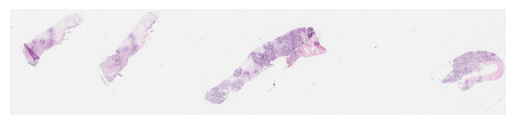

Displaying thumbnail for: 634857.svs
Attempting to open file: wsi_images/634857.svs


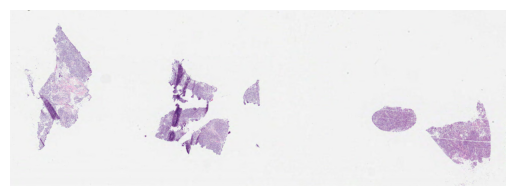

In [2]:
class WSIHandler:
    def __init__(self, wsi_folder):
        self.wsi_folder = wsi_folder
        self.files = [f for f in os.listdir(wsi_folder) if f.endswith('.svs')]

    def display_thumbnail(self, filename):
        try:
            filepath = os.path.join(self.wsi_folder, filename)
            print(f"Attempting to open file: {filepath}")
            slide = openslide.OpenSlide(filepath)
            thumbnail = slide.get_thumbnail((slide.dimensions[0] // 20, slide.dimensions[1] // 20))
            thumbnail = cv2.cvtColor(np.array(thumbnail), cv2.COLOR_RGBA2RGB)
            plt.imshow(thumbnail)
            plt.axis('off')
            plt.show()
        except openslide.OpenSlideUnsupportedFormatError as e:
            print(f"Error opening file {filename}: {e}")
        except Exception as e:
            print(f"An unexpected error occurred while processing file {filename}: {e}")

    def display_all_thumbnails(self):
        for file in self.files:
            print(f"Displaying thumbnail for: {file}")
            self.display_thumbnail(file)

# Initialize the class
wsi_handler = WSIHandler('wsi_images')
wsi_handler.display_all_thumbnails()
